# Hands-On Pertemuan 9: Spark SQL

## Tujuan:
- Mengasah keterampilan analisis data menggunakan Spark SQL.
- Melakukan lebih banyak latihan SQL yang mengarah ke skenario dunia nyata.
- Mempersiapkan mahasiswa untuk menggunakan Spark SQL dalam proyek besar.


### 1. Refresher: Basic SQL Operations in Spark SQL
- **Tugas 1**: Ulangi pemahaman Anda tentang SQL dasar dengan menjalankan queries sederhana pada dataset di Spark SQL.


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('HandsOnPertemuan9').getOrCreate()

data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
spark.sql('SELECT * FROM employees').show()
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()
spark.sql('SELECT AVG(Salary) FROM employees').show()


+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+

+------------------+
|       avg(Salary)|
+------------------+
|3266.6666666666665|
+------------------+



### Tugas 1:

In [1]:
from pyspark.sql import SparkSession

# Create Spark Session
spark = SparkSession.builder.appName('HandsOnPertemuan9').getOrCreate()

# Sample data
data = [
    ('Budi', 34, 'M', 3000, 1),
    ('Aldodi', 28, 'F', 4100, 2),
    ('LeeMalin', 23, 'M', 2700, 1),
    ('Romando', 25, 'M', 3500, 3),
    ('Malika', 30, 'F', 4000, 2),
    ('Zuyuan', 29, 'M', 3200, 4),
    ('Buride', 34, 'F', 4400, 3),
    ('Laige', 31, 'F', 3800, 4)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)

# Create a temporary view
df.createOrReplaceTempView('employees')

# Simple SQL queries
spark.sql('SELECT * FROM employees').show()
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()
spark.sql('SELECT AVG(Salary) FROM employees').show()


+--------+---+------+------+------+
|    Name|Age|Gender|Salary|DeptId|
+--------+---+------+------+------+
|    Budi| 34|     M|  3000|     1|
|  Aldodi| 28|     F|  4100|     2|
|LeeMalin| 23|     M|  2700|     1|
| Romando| 25|     M|  3500|     3|
|  Malika| 30|     F|  4000|     2|
|  Zuyuan| 29|     M|  3200|     4|
|  Buride| 34|     F|  4400|     3|
|   Laige| 31|     F|  3800|     4|
+--------+---+------+------+------+

+-------+---+
|   Name|Age|
+-------+---+
| Aldodi| 28|
|Romando| 25|
| Malika| 30|
| Zuyuan| 29|
| Buride| 34|
|  Laige| 31|
+-------+---+

+-----------+
|avg(Salary)|
+-----------+
|     3587.5|
+-----------+



### 2. Advanced Queries for Data Analysis
Gunakan queries lebih kompleks, melibatkan grouping, filtering, dan subqueries.
- **Tugas 2**: Buat SQL query yang menghitung total gaji berdasarkan jenis kelamin dan usia.


In [ ]:
spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()


+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     M|       3500| 25|
|     F|       4100| 28|
|     M|       3200| 29|
|     F|       4000| 30|
|     F|       3800| 31|
|     M|       3000| 34|
|     F|       4400| 34|
+------+-----------+---+



- **Tugas Tambahan 2**:
1. Cari rata-rata gaji per departemen.
2. Temukan karyawan yang memiliki gaji di atas rata-rata untuk gender masing-masing.
3. Buat ranking karyawan berdasarkan gaji dalam departemen mereka.


### Tugas 2:

In [ ]:
# 1. Gaji Rata Rata per Departemen
spark.sql('''
SELECT DeptId, AVG(Salary) as AvgSalary
FROM employees
GROUP BY DeptId
''').show()


+------+---------+
|DeptId|AvgSalary|
+------+---------+
|     1|   2850.0|
|     3|   3950.0|
|     2|   4050.0|
|     4|   3500.0|
+------+---------+



In [ ]:
# 2. Karyawan dengan gaji di atas rata-rata
spark.sql('''
SELECT Name, Salary, Gender
FROM employees
WHERE Salary > (SELECT AVG(Salary) FROM employees)
''').show()

+------+------+------+
|  Name|Salary|Gender|
+------+------+------+
|Aldodi|  4100|     F|
|Malika|  4000|     F|
|Buride|  4400|     F|
| Laige|  3800|     F|
+------+------+------+



In [ ]:
# 3. Peringkat karyawan berdasarkan gaji di setiap departemen
spark.sql('''
SELECT Name, Salary, DeptId,
  RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) as SalaryRank
FROM employees
''').show()

+--------+------+------+----------+
|    Name|Salary|DeptId|SalaryRank|
+--------+------+------+----------+
|    Budi|  3000|     1|         1|
|LeeMalin|  2700|     1|         2|
|  Aldodi|  4100|     2|         1|
|  Malika|  4000|     2|         2|
|  Buride|  4400|     3|         1|
| Romando|  3500|     3|         2|
|   Laige|  3800|     4|         1|
|  Zuyuan|  3200|     4|         2|
+--------+------+------+----------+



### 3. Penggunaan Window Functions dan Subqueries
Latihan penggunaan window functions untuk menemukan karyawan dengan gaji tertinggi dan urutannya berdasarkan kelompok usia.
- **Tugas 3**: Terapkan window functions untuk menemukan top 3 karyawan dalam kelompok usia tertentu.


In [ ]:
spark.sql('''
SELECT Name, Age, Salary,
  ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()


+--------+---+------+----+
|    Name|Age|Salary|rank|
+--------+---+------+----+
|LeeMalin| 23|  2700|   1|
| Romando| 25|  3500|   1|
|  Aldodi| 28|  4100|   1|
|  Zuyuan| 29|  3200|   1|
|  Malika| 30|  4000|   1|
|   Laige| 31|  3800|   1|
|  Buride| 34|  4400|   1|
|    Budi| 34|  3000|   2|
+--------+---+------+----+



### Tugas 3:

In [ ]:
# Window functions untuk menemukan top 3 karyawan dalam kelompok usia tertentu
spark.sql('''
SELECT Name, Age, Salary, rank
FROM (
  SELECT Name, Age, Salary,
    ROW_NUMBER() OVER (PARTITIOn BY Age ORDER BY Salary DESC) AS rank
  FROM employees
) ranked_employees
WHERE rank <= 3
''').show()


+--------+---+------+----+
|    Name|Age|Salary|rank|
+--------+---+------+----+
|LeeMalin| 23|  2700|   1|
| Romando| 25|  3500|   1|
|  Aldodi| 28|  4100|   1|
|  Zuyuan| 29|  3200|   1|
|  Malika| 30|  4000|   1|
|   Laige| 31|  3800|   1|
|  Buride| 34|  4400|   1|
|    Budi| 34|  3000|   2|
+--------+---+------+----+



### 4. Advanced Spark SQL Queries
Menjelajahi queries yang lebih kompleks yang melibatkan multiple joins, subqueries, dan window functions.
- **Tugas 4**: Demonstrasi penggunaan multi-level joins dan subqueries untuk analisis data yang mendalam.


In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()


+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+



Latihan mandiri untuk memperkuat pemahaman tentang Spark SQL dalam analisis data terdistribusi.
- **Tugas 5**: Tuliskan query SQL untuk menemukan rata-rata gaji per departemen dan rangking setiap karyawan dalam departemen berdasarkan gaji.
- **Tugas 6**: Gunakan window functions untuk menentukan tren gaji berdasarkan usia di setiap departemen.


### Tugas 4:


In [5]:
# Multi-level joins dan subqueries
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data Setup
employees = spark.createDataFrame([
    ('Budi', 34, 'M', 3000, 1),
    ('Aldodi', 28, 'F', 4100, 2),
    ('LeeMalin', 23, 'M', 2700, 1),
    ('Romando', 25, 'M', 3500, 3),
    ('Malika', 30, 'F', 4000, 2),
    ('Zuyuan', 29, 'M', 3200, 4),
    ('Buride', 34, 'F', 4400, 3),
    ('Laige', 31, 'F', 3800, 4)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departements = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing'),
    (3, 'Finance'),
    (4, 'IT')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project Alpha'),
    (2, 'Project Beta'),
    (3, 'Project Gamma'),
    (4, 'Project Delta')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departements.createOrReplaceTempView('departements')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departements d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()

+--------+---+---------+-------------+
|    Name|Age| DeptName|  ProjectName|
+--------+---+---------+-------------+
|LeeMalin| 23|       HR|Project Alpha|
|    Budi| 34|       HR|Project Alpha|
|  Malika| 30|Marketing| Project Beta|
|  Aldodi| 28|Marketing| Project Beta|
|  Buride| 34|  Finance|Project Gamma|
| Romando| 25|  Finance|Project Gamma|
|   Laige| 31|       IT|Project Delta|
|  Zuyuan| 29|       IT|Project Delta|
+--------+---+---------+-------------+



### Tugas 5:

In [ ]:
# Query SQL untuk rata-rata gaji per departemen dan rangking setiap karyawan berdasarkan gaji setiap departemen
spark.sql('''
SELECT e.Name, e.Salary, d.DeptName,
  AVG(e.Salary) OVER (PARTITION BY d.DeptName) AS AvgSalary,
  RANK() OVER (PARTITION BY d.DeptName ORDER BY e.Salary DESC) AS SalaryRank
FROM employees e
JOIN departements d ON e.DeptId = d.DeptID
''').show()

+--------+------+---------+---------+----------+
|    Name|Salary| DeptName|AvgSalary|SalaryRank|
+--------+------+---------+---------+----------+
|  Buride|  4400|  Finance|   3950.0|         1|
| Romando|  3500|  Finance|   3950.0|         2|
|    Budi|  3000|       HR|   2850.0|         1|
|LeeMalin|  2700|       HR|   2850.0|         2|
|   Laige|  3800|       IT|   3500.0|         1|
|  Zuyuan|  3200|       IT|   3500.0|         2|
|  Aldodi|  4100|Marketing|   4050.0|         1|
|  Malika|  4000|Marketing|   4050.0|         2|
+--------+------+---------+---------+----------+



### Tugas 6:

In [ ]:
#  Tren gaji berdasarkan usia di setiap departemen dengan window functions
spark.sql('''
SELECT e.Age, e.DeptId, AVG(Salary) AS AverageSalary
FROM employees e
GROUP BY e.Age, e.DeptId
ORDER BY e.DeptId, e.Age
''').show()


+---+------+-------------+
|Age|DeptId|AverageSalary|
+---+------+-------------+
| 34|     1|       3000.0|
| 23|     1|       2700.0|
| 28|     2|       4100.0|
| 30|     2|       4000.0|
| 25|     3|       3500.0|
| 34|     3|       4400.0|
| 29|     4|       3200.0|
| 31|     4|       3800.0|
+---+------+-------------+



### 5. Advanced Data Analysis and Visualization
Penerapan teknik analisis data yang lebih canggih dan visualisasi menggunakan PySpark dan matplotlib.
- **Tugas 7**: Lakukan analisis tren gaji menggunakan Spark SQL dan visualisasikan hasilnya.


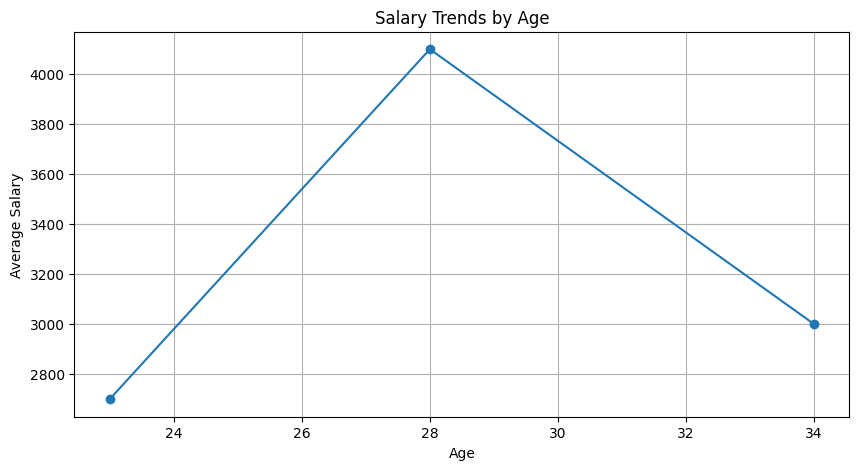

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Advanced data analysis with visualization
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

# Visualization of salary trends
plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()


### Tugas 7:

   Age  DeptId  AverageSalary
0   34       1         3000.0
1   23       1         2700.0
2   28       2         4100.0
3   30       2         4000.0
4   25       3         3500.0
5   34       3         4400.0
6   29       4         3200.0
7   31       4         3800.0


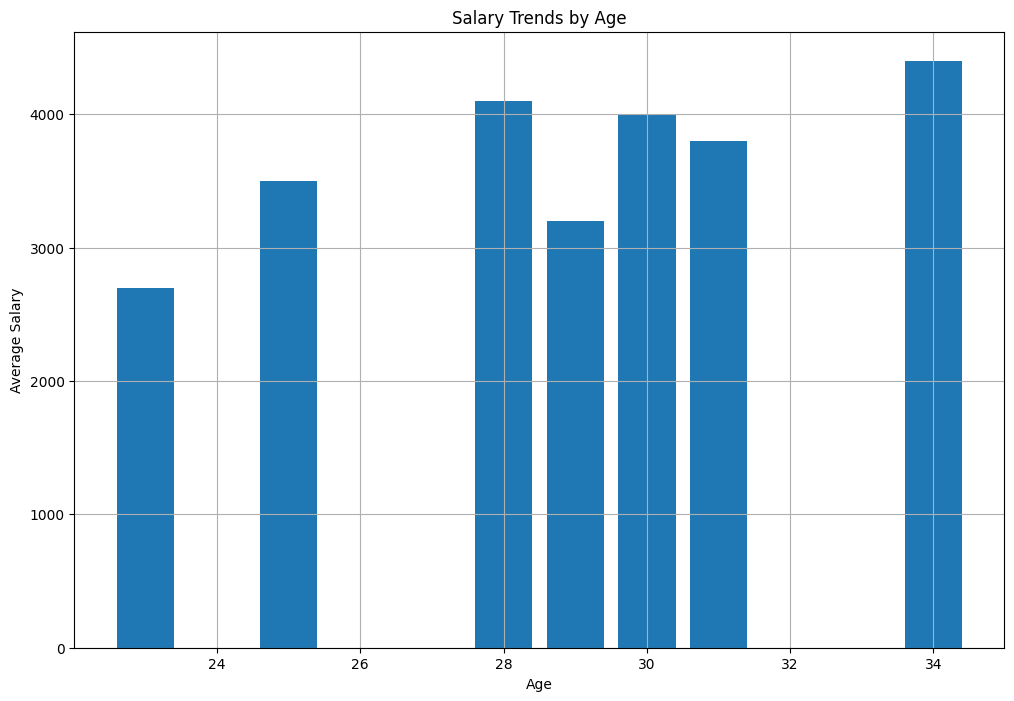

In [11]:
# Analisis tren gaji menggunakan Spark SQL dan visualisasikan
import matplotlib.pyplot as plt
import pandas as pd

Trend_salary = spark.sql('''
SELECT e.Age, e.DeptId, AVG(Salary) AS AverageSalary
FROM employees e
GROUP BY e.Age, e.DeptId
ORDER BY e.DeptId
''').toPandas()

print(Trend_salary)

plt.figure(figsize=(12, 8))
plt.bar(Trend_salary['Age'], Trend_salary['AverageSalary'])
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()

### 6. Homework
- **Tugas 1**: Gunakan Spark SQL untuk mencari total gaji dan jumlah karyawan per departemen. Buat visualisasi perbandingan antar departemen.
- **Tugas 2**: Temukan karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia dan visualisasikan data ini dalam bentuk grafik batang atau pie chart.
- **Tugas 3**: Buat dataset yang lebih besar (misalnya, 100+ baris) dan lakukan analisis mendalam menggunakan SQL functions seperti `SUM()`, `AVG()`, `COUNT()`, serta `JOIN` antar tabel serta buat visualisasi yang menarik.


   DeptId  TotalSalary  EmployeeCount
0       1         5700              2
1       3         7900              2
2       2         8100              2
3       4         7000              2


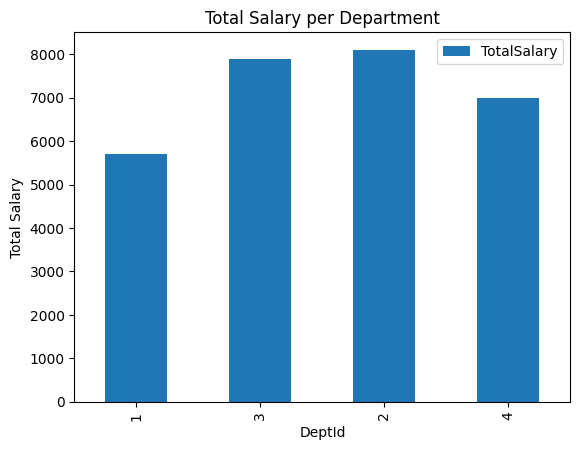

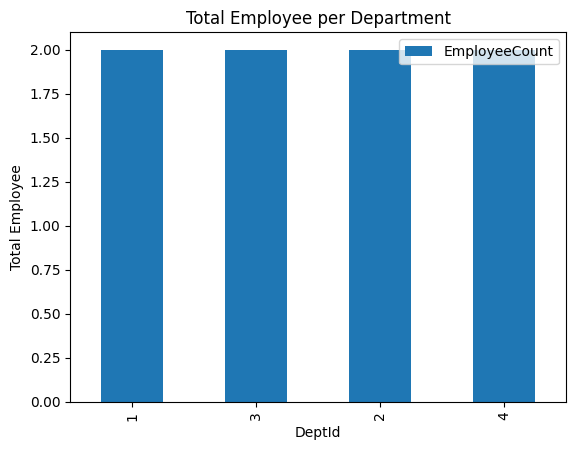

In [9]:
# Query for total salary and employee count per department
import matplotlib.pyplot as plt
import pandas as pd

dept_salary = spark.sql('''
SELECT DeptId, SUM(Salary) as TotalSalary, COUNT(*) as EmployeeCount
FROM employees
GROUP BY DeptId
''').toPandas()

print(dept_salary)

# Visualization of total salary
dept_salary.plot(kind='bar', x='DeptId', y='TotalSalary', legend=True)
plt.title('Total Salary per Department')
plt.ylabel('Total Salary')
plt.show()

# Visualization of total employee
dept_salary.plot(kind='bar', x='DeptId', y='EmployeeCount', legend=True)
plt.title('Total Employee per Department')
plt.ylabel('Total Employee')
plt.show()


     Name  Age  Salary  AvgSalary
0  Buride   34    4400     3700.0


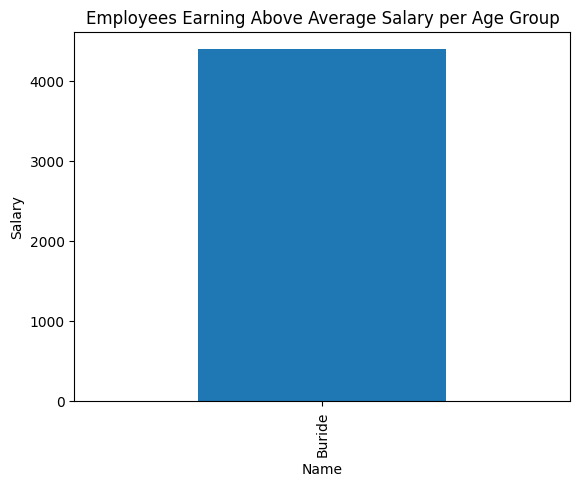

In [10]:
above_avg_salary = spark.sql('''
WITH AgeAvg AS (
  SELECT Age, AVG(Salary) AS AvgSalary
  FROM employees
  GROUP BY Age
)
SELECT e.Name, e.Age, e.Salary, a.AvgSalary
FROM employees e
JOIN AgeAvg a ON e.Age = a.Age
WHERE e.Salary > a.AvgSalary
''').toPandas()

print(above_avg_salary)

# Visualize above average salary employees
above_avg_salary.plot(kind='bar', x='Name', y='Salary', legend=False)
plt.title('Employees Earning Above Average Salary per Age Group')
plt.ylabel('Salary')
plt.show()


Students
+---------------+---+--------------------+---+----------+
|           Name|Age|               Major|GPA|      City|
+---------------+---+--------------------+---+----------+
|   Andi Santoso| 20|Information Techn...|3.5|   Jakarta|
|     Budi Utami| 21|    Computer Science|3.7|   Bandung|
|     Cindy Rani| 22|Electrical Engine...|3.2|Yogyakarta|
|  Dewi Agustina| 23|Mechanical Engine...|3.9|  Surabaya|
|       Eka Wati| 20|   Civil Engineering|3.6|  Semarang|
|   Fandi Hendra| 24|Industrial Engine...|3.1|     Medan|
|   Gita Lestari| 19|Information Techn...|3.8|    Malang|
|  Hendra Rahman| 22|    Computer Science|3.4|      Bali|
|       Ika Sari| 21|Electrical Engine...|3.5|  Makassar|
|   Joni Prabowo| 25|Mechanical Engine...|3.6| Palembang|
|   Kiki Susanto| 20|   Civil Engineering|3.3|   Bandung|
| Lina Setiawati| 24|Industrial Engine...|3.8|  Surabaya|
|  Maya Indriani| 23|Information Techn...|3.7|   Jakarta|
|   Nina Raharjo| 22|    Computer Science|3.6|Yogyakarta|
|    

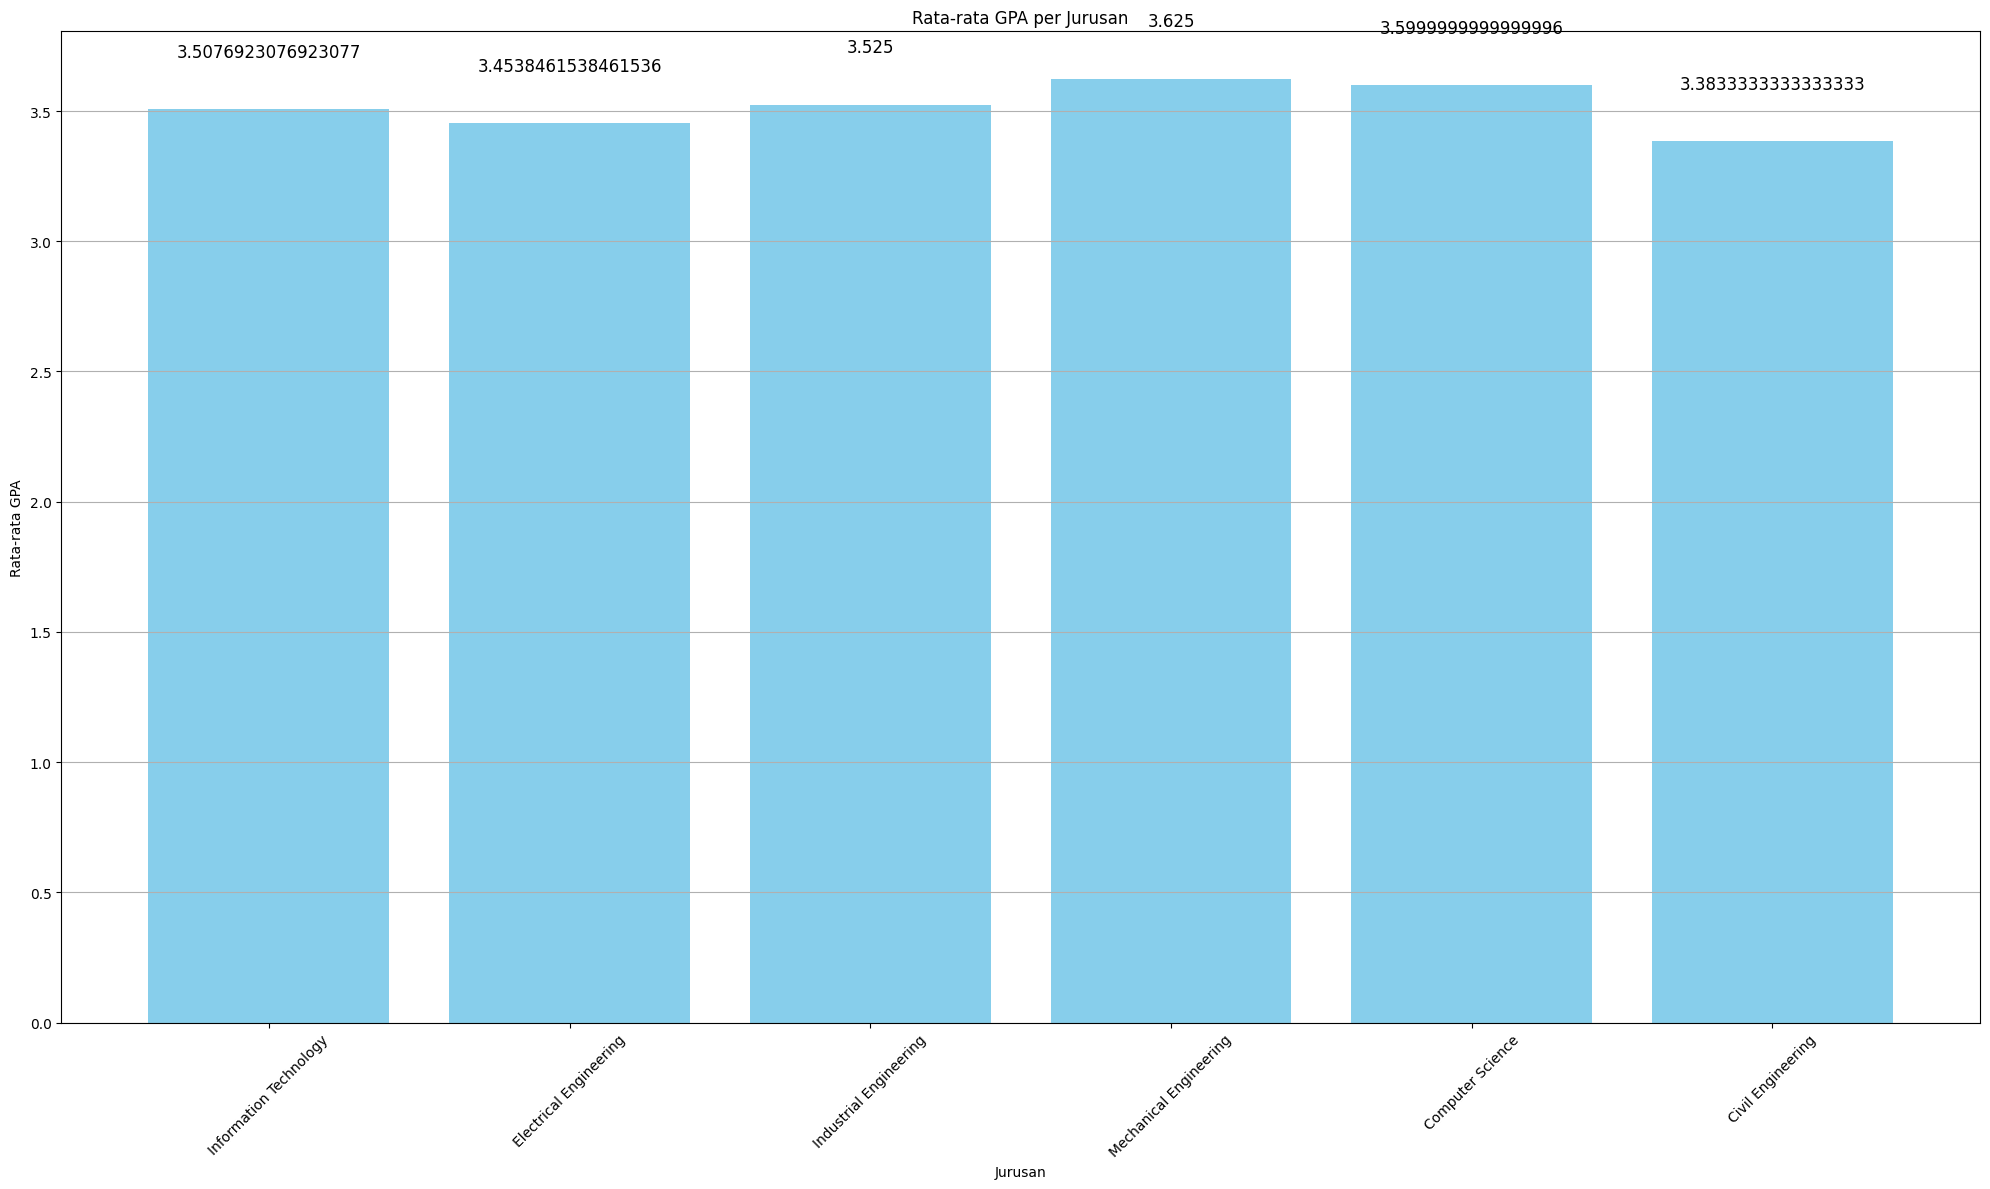

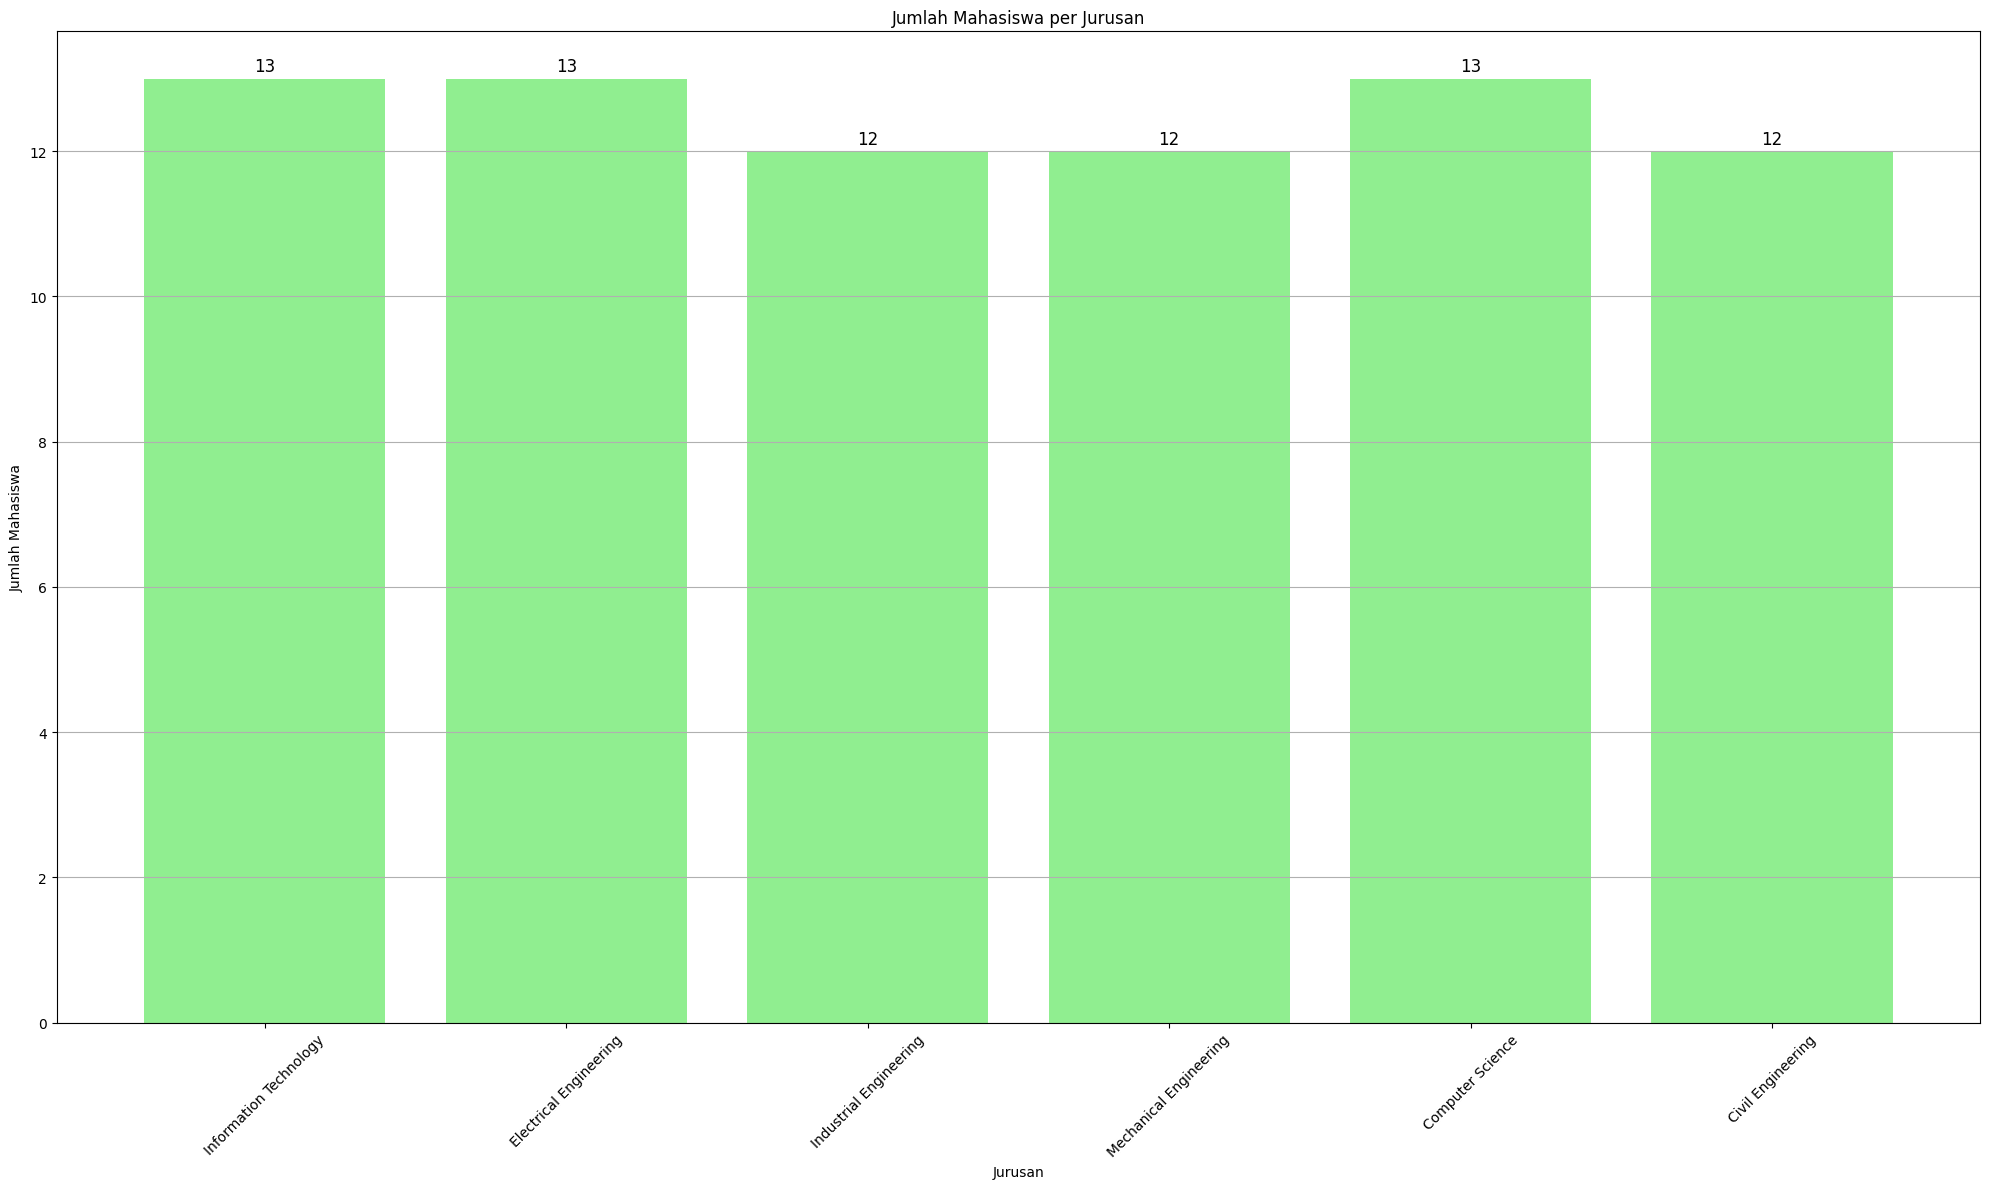

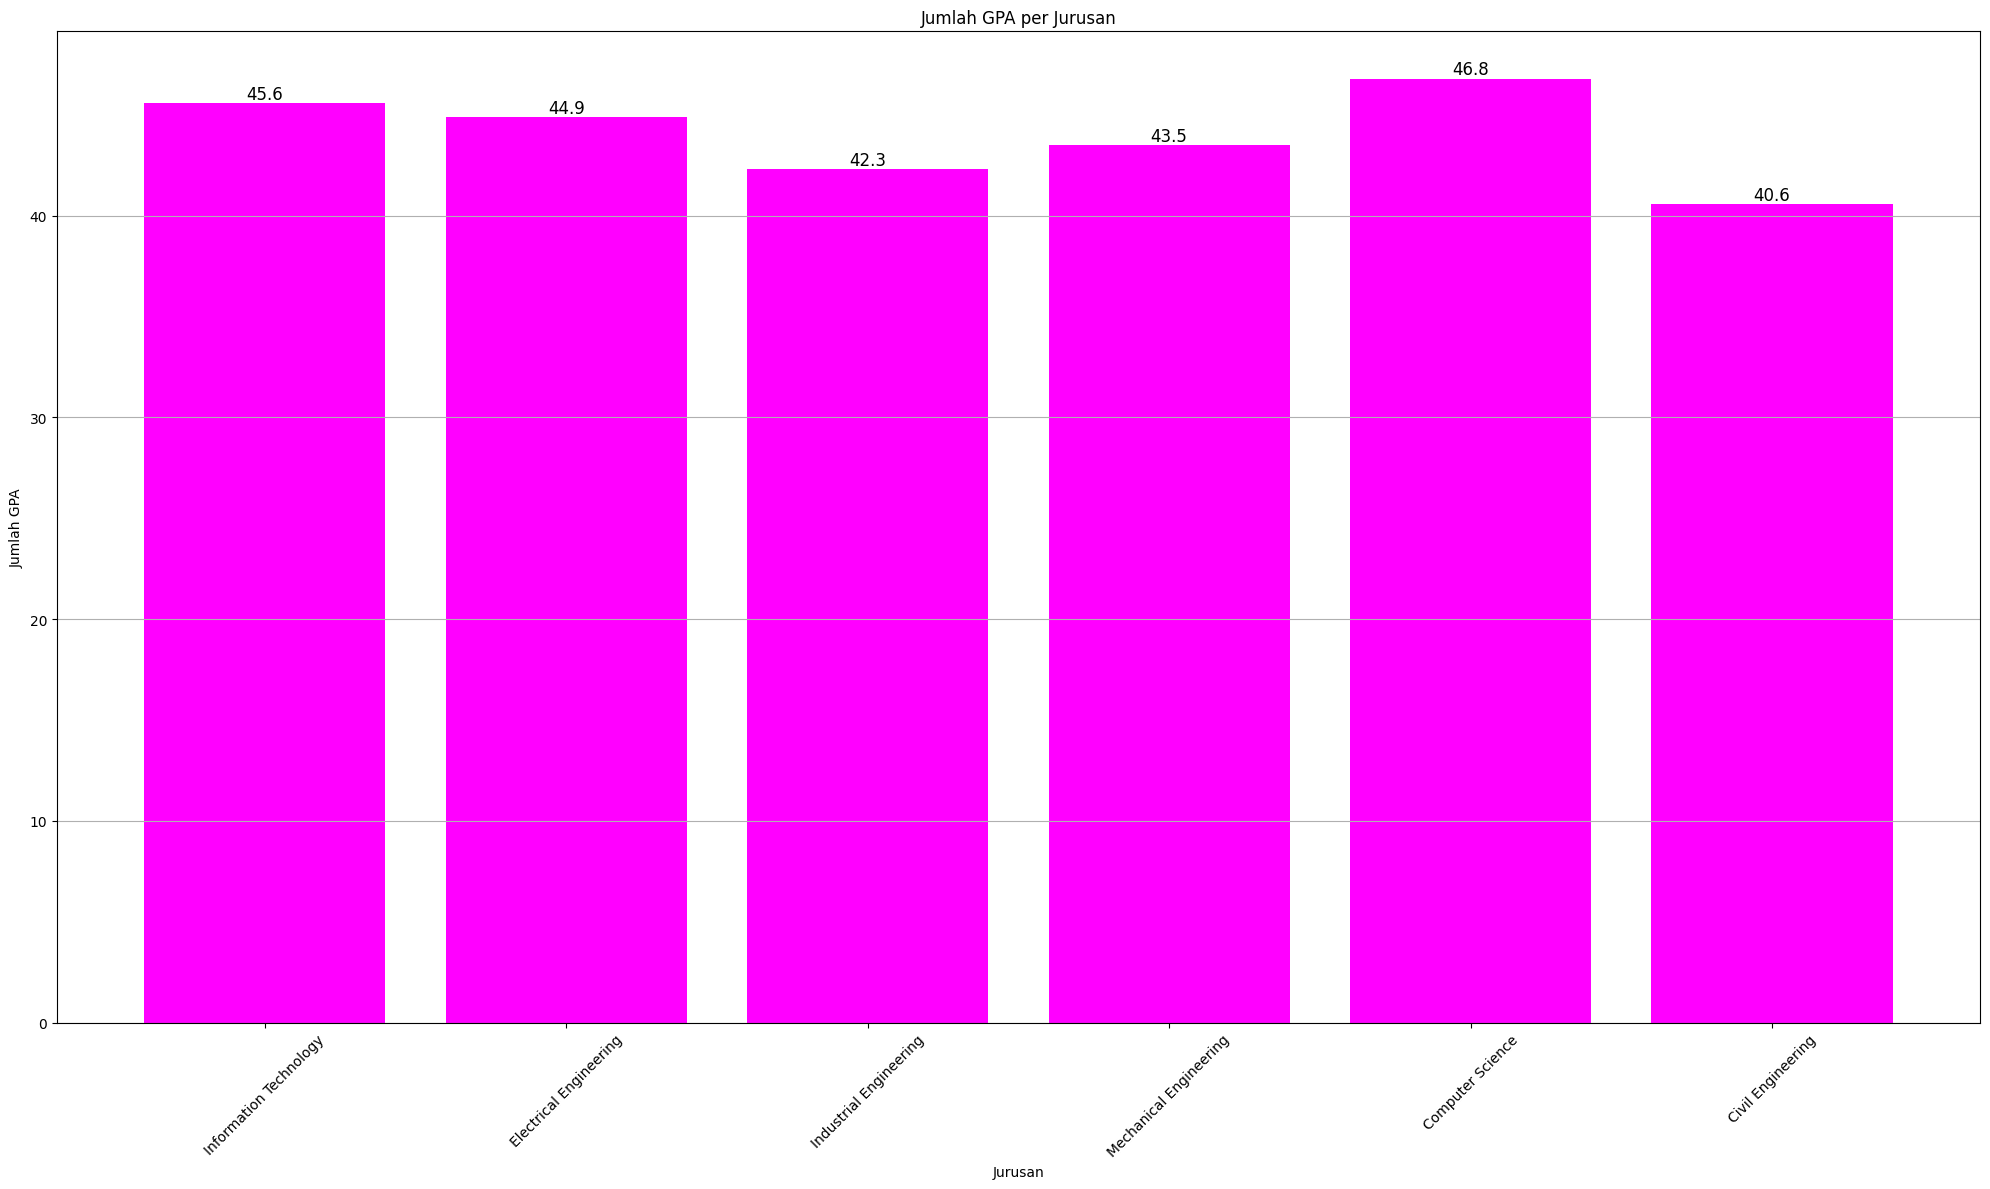

In [49]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Membuat sesi Spark
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Daftar nama mahasiswa Indonesia dengan nilai
students_data = [
    ('Andi Santoso', 20, 'Information Technology', 3.5, 'Jakarta'),
    ('Budi Utami', 21, 'Computer Science', 3.7, 'Bandung'),
    ('Cindy Rani', 22, 'Electrical Engineering', 3.2, 'Yogyakarta'),
    ('Dewi Agustina', 23, 'Mechanical Engineering', 3.9, 'Surabaya'),
    ('Eka Wati', 20, 'Civil Engineering', 3.6, 'Semarang'),
    ('Fandi Hendra', 24, 'Industrial Engineering', 3.1, 'Medan'),
    ('Gita Lestari', 19, 'Information Technology', 3.8, 'Malang'),
    ('Hendra Rahman', 22, 'Computer Science', 3.4, 'Bali'),
    ('Ika Sari', 21, 'Electrical Engineering', 3.5, 'Makassar'),
    ('Joni Prabowo', 25, 'Mechanical Engineering', 3.6, 'Palembang'),
    ('Kiki Susanto', 20, 'Civil Engineering', 3.3, 'Bandung'),
    ('Lina Setiawati', 24, 'Industrial Engineering', 3.8, 'Surabaya'),
    ('Maya Indriani', 23, 'Information Technology', 3.7, 'Jakarta'),
    ('Nina Raharjo', 22, 'Computer Science', 3.6, 'Yogyakarta'),
    ('Oka Budiman', 21, 'Electrical Engineering', 3.9, 'Denpasar'),
    ('Putri Anggraini', 20, 'Mechanical Engineering', 3.4, 'Semarang'),
    ('Rina Suryani', 25, 'Civil Engineering', 3.0, 'Medan'),
    ('Sari Ningsih', 19, 'Industrial Engineering', 3.5, 'Bali'),
    ('Toni Wibowo', 22, 'Information Technology', 3.3, 'Jakarta'),
    ('Umi Khairunnisa', 21, 'Computer Science', 3.8, 'Malang'),
    ('Vina Fitria', 20, 'Electrical Engineering', 3.2, 'Makassar'),
    ('Wira Santika', 24, 'Mechanical Engineering', 3.6, 'Palembang'),
    ('Xena Diah', 23, 'Civil Engineering', 3.1, 'Surabaya'),
    ('Yudi Prasetyo', 20, 'Industrial Engineering', 3.4, 'Yogyakarta'),
    ('Zahra Dewi', 25, 'Information Technology', 3.7, 'Denpasar'),
    ('Ali Junaidi', 21, 'Computer Science', 3.5, 'Medan'),
    ('Beni Setiawan', 22, 'Electrical Engineering', 3.8, 'Bandung'),
    ('Cindy Ananda', 20, 'Mechanical Engineering', 3.6, 'Jakarta'),
    ('Dani Hermawan', 24, 'Civil Engineering', 3.3, 'Semarang'),
    ('Eko Saputra', 19, 'Industrial Engineering', 3.9, 'Yogyakarta'),
    ('Fikri Rachman', 21, 'Information Technology', 3.5, 'Surabaya'),
    ('Gina Rahayu', 23, 'Computer Science', 3.7, 'Malang'),
    ('Hadiyanto', 20, 'Electrical Engineering', 3.2, 'Makassar'),
    ('Intan Lestari', 25, 'Mechanical Engineering', 3.8, 'Denpasar'),
    ('Joko Susilo', 22, 'Civil Engineering', 3.4, 'Jakarta'),
    ('Kusnadi', 24, 'Industrial Engineering', 3.6, 'Palembang'),
    ('Lutfi Aditya', 19, 'Information Technology', 3.1, 'Bali'),
    ('Mukti Purnomo', 21, 'Computer Science', 3.5, 'Yogyakarta'),
    ('Nugroho Adi', 20, 'Electrical Engineering', 3.8, 'Medan'),
    ('Olin Rahmawati', 23, 'Mechanical Engineering', 3.4, 'Bandung'),
    ('Putra Hidayat', 22, 'Civil Engineering', 3.7, 'Surabaya'),
    ('Randy Irawan', 24, 'Industrial Engineering', 3.3, 'Jakarta'),
    ('Sinta Azhari', 20, 'Information Technology', 3.6, 'Malang'),
    ('Tina Kurniawati', 25, 'Computer Science', 3.8, 'Denpasar'),
    ('Umar Fikri', 22, 'Electrical Engineering', 3.2, 'Makassar'),
    ('Vino Aditya', 21, 'Mechanical Engineering', 3.9, 'Palembang'),
    ('Wahyu Setiawan', 19, 'Civil Engineering', 3.4, 'Yogyakarta'),
    ('Yuli Iskandar', 24, 'Industrial Engineering', 3.5, 'Bandung'),
    ('Zainal Mardiyah', 20, 'Information Technology', 3.1, 'Jakarta'),
    ('Aditya Rahman', 22, 'Computer Science', 3.6, 'Semarang'),
    ('Bunga Merah', 23, 'Electrical Engineering', 3.2, 'Surabaya'),
    ('Candra Melati', 24, 'Mechanical Engineering', 3.8, 'Yogyakarta'),
    ('Dito Prasetyo', 20, 'Civil Engineering', 3.4, 'Malang'),
    ('Eva Maulida', 25, 'Industrial Engineering', 3.6, 'Denpasar'),
    ('Fira Nisa', 21, 'Information Technology', 3.7, 'Medan'),
    ('Gandi Rahmad', 20, 'Computer Science', 3.1, 'Jakarta'),
    ('Husna Ayu', 24, 'Electrical Engineering', 3.8, 'Bandung'),
    ('Iwan Kurniawan', 19, 'Mechanical Engineering', 3.5, 'Surabaya'),
    ('Julianti Amani', 23, 'Civil Engineering', 3.4, 'Yogyakarta'),
    ('Kania Puspa', 20, 'Industrial Engineering', 3.3, 'Semarang'),
    ('Lili Setyani', 25, 'Information Technology', 3.6, 'Malang'),
    ('Megan Cipta', 22, 'Computer Science', 3.9, 'Denpasar'),
    ('Nina Sari', 21, 'Electrical Engineering', 3.5, 'Jakarta'),
    ('Oki Haryanto', 20, 'Mechanical Engineering', 3.7, 'Bandung'),
    ('Pangestu Yudha', 24, 'Civil Engineering', 3.2, 'Surabaya'),
    ('Qori Ananda', 22, 'Industrial Engineering', 3.8, 'Yogyakarta'),
    ('Rafi Irawan', 20, 'Information Technology', 3.1, 'Semarang'),
    ('Sandi Lestari', 25, 'Computer Science', 3.6, 'Malang'),
    ('Tariq Rahman', 21, 'Electrical Engineering', 3.4, 'Denpasar'),
    ('Uli Suryadi', 19, 'Mechanical Engineering', 3.3, 'Jakarta'),
    ('Vina Hermita', 22, 'Civil Engineering', 3.8, 'Bandung'),
    ('Wira Aulia', 24, 'Industrial Engineering', 3.5, 'Surabaya'),
    ('Xandra Mardiana', 20, 'Information Technology', 3.9, 'Yogyakarta'),
    ('Yanto Budi', 21, 'Computer Science', 3.6, 'Malang'),
    ('Zara Safira', 23, 'Electrical Engineering', 3.2, 'Denpasar')
]

# Data setup dengan nama mahasiswa yang telah ditentukan
students = spark.createDataFrame(students_data, ['Name', 'Age', 'Major', 'GPA', 'City'])

# Membuat tabel Departments
departments_data = [
    ('Information Technology', 'Faculty of Engineering'),
    ('Computer Science', 'Faculty of Engineering'),
    ('Electrical Engineering', 'Faculty of Engineering'),
    ('Mechanical Engineering', 'Faculty of Engineering'),
    ('Civil Engineering', 'Faculty of Engineering'),
    ('Industrial Engineering', 'Faculty of Engineering'),
    ('Mathematics', 'Faculty of Science'),
    ('Physics', 'Faculty of Science'),
    ('Chemistry', 'Faculty of Science'),
    ('Biology', 'Faculty of Science')
]

departments = spark.createDataFrame(departments_data, ['Department', 'Faculty'])

# Membuat tabel Courses
courses_data = [
    ('Data Structures', 'Computer Science'),
    ('Database Systems', 'Information Technology'),
    ('Software Engineering', 'Computer Science'),
    ('Operating Systems', 'Computer Science'),
    ('Network Security', 'Information Technology'),
    ('Machine Learning', 'Computer Science'),
    ('Digital Logic', 'Electrical Engineering'),
    ('Control Systems', 'Mechanical Engineering'),
    ('Engineering Mechanics', 'Civil Engineering'),
    ('Statistical Methods', 'Industrial Engineering')
]

courses = spark.createDataFrame(courses_data, ['Course', 'Department'])

# Menampilkan DataFrames
print("Students")
students.show(100)
print("Departments")
departments.show(100)
print("Courses")
courses.show(100)

# 1. Menghitung rata-rata GPA per jurusan
print("GPA/Jurusan")
average_gpa_per_major = students.groupBy("Major").agg(F.avg("GPA").alias("Average GPA"))
average_gpa_per_major.show()

# 2. Menghitung jumlah mahasiswa per jurusan
print("Jumlah Mahasiswa/Jurusan")
count_students_per_major = students.groupBy("Major").agg(F.count("Name").alias("Count"))
count_students_per_major.show()

# 3. Menghitung total GPA untuk setiap jurusan
print("Jumlah GPA/Jurusan")
total_gpa_per_major = students.groupBy("Major").agg(F.sum("GPA").alias("Total GPA"))
total_gpa_per_major.show()

# 4. Menggabungkan DataFrames (JOIN) antara students dan departments
print("Menggabungkan dataframe")
joined_df = students.join(departments, students.Major == departments.Department, 'inner') \
    .select(students.Name, students.Age, students.GPA, departments.Faculty)

# Menampilkan DataFrame yang telah digabungkan
joined_df.show(100)

# Visualisasi
# Menghitung rata-rata GPA per jurusan untuk visualisasi
avg_gpa_data = average_gpa_per_major.toPandas()
plt.figure(figsize=(20, 12))
plt.bar(avg_gpa_data['Major'], avg_gpa_data['Average GPA'], color='skyblue')
plt.title('Rata-rata GPA per Jurusan')
plt.xlabel('Jurusan')
plt.ylabel('Rata-rata GPA')
plt.xticks(rotation=45)
plt.grid(axis='y')
for index, value in enumerate(avg_gpa_data['Average GPA']):
    plt.text(index, value + 0.2, str(value), ha='center', fontsize=12)
plt.tight_layout()
plt.show()

# Menghitung jumlah mahasiswa per jurusan untuk visualisasi
count_data = count_students_per_major.toPandas()
plt.figure(figsize=(20, 12))
plt.bar(count_data['Major'], count_data['Count'], color='lightgreen')
plt.title('Jumlah Mahasiswa per Jurusan')
plt.xlabel('Jurusan')
plt.ylabel('Jumlah Mahasiswa')
plt.xticks(rotation=45)
plt.grid(axis='y')
for index, value in enumerate(count_data['Count']):
    plt.text(index, value + 0.1, str(value), ha='center', fontsize=12)
plt.tight_layout()
plt.show()

# Menghitung jumlah GPA per jurusan untuk visualisasi
total_gpa = total_gpa_per_major.toPandas()
plt.figure(figsize=(20, 12))
plt.bar(count_data['Major'], total_gpa["Total GPA"], color='magenta')
plt.title('Jumlah GPA per Jurusan')
plt.xlabel('Jurusan')
plt.ylabel('Jumlah GPA')
plt.xticks(rotation=45)
plt.grid(axis='y')
for index, value in enumerate(total_gpa["Total GPA"]):
    plt.text(index, value + 0.2, str(value), ha='center', fontsize=12)
plt.tight_layout()
plt.show()

# Menghentikan sesi Spark
spark.stop()

